# Reproducible Analysis

### data pre-processing

In [1]:
import os
import pandas as pd
import numpy as np

In [3]:
cols=['id','host_id','host_since','first_review', 'last_review','latitude', 'longitude']
url = 'http://data.insideairbnb.com/united-kingdom/england/london/2015-04-06/data/listings.csv.gz'
df15 = pd.read_csv(url, compression='gzip', low_memory=False,usecols=cols)
print(f"Data frame is {df15.shape[0]:,} x {df15.shape[1]}")

Data frame is 18,436 x 7


In [4]:
cols=['id','host_id','host_since','first_review', 'last_review','latitude', 'longitude']
url = 'http://data.insideairbnb.com/united-kingdom/england/london/2016-06-02/data/listings.csv.gz'
df16 = pd.read_csv(url, compression='gzip', low_memory=False,usecols=cols)
print(f"Data frame is {df16.shape[0]:,} x {df16.shape[1]}")

Data frame is 42,646 x 7


In [5]:
cols=['id','host_id','host_since','first_review', 'last_review','latitude', 'longitude']
url = 'http://data.insideairbnb.com/united-kingdom/england/london/2017-03-04/data/listings.csv.gz'
df17 = pd.read_csv(url, compression='gzip', low_memory=False,usecols=cols)
print(f"Data frame is {df17.shape[0]:,} x {df17.shape[1]}")

Data frame is 53,904 x 7


In [6]:
cols=['id','host_id','host_since','first_review', 'last_review','latitude', 'longitude']
url = 'http://data.insideairbnb.com/united-kingdom/england/london/2018-05-11/data/listings.csv.gz'
df18 = pd.read_csv(url, compression='gzip', low_memory=False,usecols=cols)
print(f"Data frame is {df18.shape[0]:,} x {df18.shape[1]}")

Data frame is 69,886 x 7


In [7]:
cols=['id','host_id','host_since','first_review', 'last_review','latitude', 'longitude']
url = 'http://data.insideairbnb.com/united-kingdom/england/london/2019-04-09/data/listings.csv.gz'
df19 = pd.read_csv(url, compression='gzip', low_memory=False,usecols=cols)
print(f"Data frame is {df19.shape[0]:,} x {df19.shape[1]}")

Data frame is 79,671 x 7


In [8]:
frame=[df15,df16,df17,df18,df19]

In [16]:
for i in frame:
    i.drop(i[i.id.isna()].index.values, axis=0, inplace=True)
    print(f"Data frame is {i.shape[0]:,} x {i.shape[1]}") 

Data frame is 18,436 x 7
Data frame is 42,646 x 7
Data frame is 53,904 x 7
Data frame is 69,886 x 7
Data frame is 79,671 x 7


In [9]:
df16.head()

,id,host_id,host_since,latitude,longitude,first_review,last_review
0,6781198,21869529,2014-09-28,51.398883,-0.278265,2015-07-24,2016-01-09
1,5290274,27396120,2015-02-08,51.421111,-0.280557,2015-04-06,2015-05-12
2,4023781,20860377,2014-09-02,51.414036,-0.286075,2014-10-05,2015-12-19
3,5098744,26345340,2015-01-19,51.413899,-0.306505,2015-02-28,2016-02-18
4,11093420,52632402,2015-12-29,51.408234,-0.291167,2016-02-09,2016-04-01


In [ ]:
listing15 = gpd.GeoDataFrame(df15,geometry=gpd.points_from_xy(df15.longitude,df15.latitude,crs='epsg:4326')).to_crs('epsg:27700')
listing16 = gpd.GeoDataFrame(df16,geometry=gpd.points_from_xy(df16.longitude,df16.latitude,crs='epsg:4326')).to_crs('epsg:27700')
listing17 = gpd.GeoDataFrame(df17,geometry=gpd.points_from_xy(df17.longitude,df17.latitude,crs='epsg:4326')).to_crs('epsg:27700')
listing18 = gpd.GeoDataFrame(df18,geometry=gpd.points_from_xy(df18.longitude,df18.latitude,crs='epsg:4326')).to_crs('epsg:27700')
listing19 = gpd.GeoDataFrame(df19,geometry=gpd.points_from_xy(df19.longitude,df19.latitude,crs='epsg:4326')).to_crs('epsg:27700')
    #gdf=gpd.sjoin(boro, listing, how='inner').drop(columns=['latitude','longitude','index_right'])
    #gdf_1 = gdf.groupby('GSS_CODE')['id'].agg(Number_of_Listings_2015='count').reset_index() 
    

In [ ]:
boro = gpd.read_file(os.path.join('data','geo','Boroughs.gpkg'), driver='GPKG')

In [ ]:
listings=[listing15,listing16,listing17,listing18,listing19]

In [ ]:
gdf15=gpd.sjoin(boro, listing15, how='inner').drop(columns=['latitude','longitude','index_right'])
gdf16=gpd.sjoin(boro, listing16, how='inner').drop(columns=['latitude','longitude','index_right'])
gdf17=gpd.sjoin(boro, listing17, how='inner').drop(columns=['latitude','longitude','index_right'])
gdf18=gpd.sjoin(boro, listing18, how='inner').drop(columns=['latitude','longitude','index_right'])
gdf19=gpd.sjoin(boro, listing19, how='inner').drop(columns=['latitude','longitude','index_right'])


In [ ]:
gdf15_1 = gdf15.groupby('GSS_CODE')['id'].agg(Number_of_Listings='count').reset_index() 
gdf16_1 = gdf16.groupby('GSS_CODE')['id'].agg(Number_of_Listings='count').reset_index() 
gdf17_1 = gdf17.groupby('GSS_CODE')['id'].agg(Number_of_Listings='count').reset_index() 
gdf18_1 = gdf18.groupby('GSS_CODE')['id'].agg(Number_of_Listings='count').reset_index() 
gdf19_1 = gdf19.groupby('GSS_CODE')['id'].agg(Number_of_Listings='count').reset_index() 


In [ ]:
df15_1 = pd.DataFrame(gdf15_1)
df16_1 = pd.DataFrame(gdf16_1)
df17_1 = pd.DataFrame(gdf17_1)
df18_1 = pd.DataFrame(gdf18_1)
df19_1 = pd.DataFrame(gdf19_1)

In [ ]:
a='Year'
df15_1[a]=2015
df16_1[a]=2016
df17_1[a]=2017
df18_1[a]=2018
df19_1[a]=2019

In [ ]:
frame1=[df15_1,df16_1,df17_1,df18_1,df19_1]
Airbnb_listing = pd.concat(frame1)

In [ ]:
Airbnb_listing

### Education

In [10]:
url = 'https://raw.githubusercontent.com/Jiawei997/i2p/main/education.csv'
df_ed = pd.read_csv(url, low_memory=False)
print(f"Data frame is {df_ed.shape[0]:,} x {df_ed.shape[1]}")

Data frame is 5,558 x 8


In [12]:
df_ed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5558 entries, 0 to 5557
Data columns (total 8 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   Code                                              5558 non-null   object
 1   Area                                              5558 non-null   object
 2   Year                                              5558 non-null   int64 
 3   Qualifications of working age population (16-64)  5558 non-null   object
 4   number                                            5558 non-null   object
 5   denominator                                       5558 non-null   object
 6   percent                                           5558 non-null   object
 7   confidence                                        5558 non-null   object
dtypes: int64(1), object(7)
memory usage: 347.5+ KB


In [13]:
search ='E09'
E09=df_ed['Code'].str.startswith(search) 
df1_ed=df_ed[E09]

In [15]:
df2_ed = df1_ed[(df1_ed.Year>2014) & (df1_ed['Qualifications of working age population (16-64)']=='NVQ4+')]
df2_ed

,Code,Area,Year,Qualifications of working age population (16-64),number,denominator,percent,confidence
3815,E09000001,City of London,2015,NVQ4+,"4,500","5,700",80,*
3816,E09000002,Barking and Dagenham,2015,NVQ4+,"41,000","126,800",32.4,3.9
3817,E09000003,Barnet,2015,NVQ4+,"119,700","243,700",49.1,4.3
3818,E09000004,Bexley,2015,NVQ4+,"50,900","151,500",33.6,4.3
3819,E09000005,Brent,2015,NVQ4+,"99,300","220,400",45.1,3.6
...,...,...,...,...,...,...,...,...
5243,E09000029,Sutton,2019,NVQ4+,60500,131800,45.9,4.3
5244,E09000030,Tower Hamlets,2019,NVQ4+,142500,235600,60.5,4.8
5245,E09000031,Waltham Forest,2019,NVQ4+,94800,188900,50.2,5.2
5246,E09000032,Wandsworth,2019,NVQ4+,168300,235200,71.6,4.5


In [16]:
df3_ed=df_ed.iloc[4872:4905]
df3_ed

,Code,Area,Year,Qualifications of working age population (16-64),number,denominator,percent,confidence
4872,E09000001,City of London,2018,NVQ4+,"7,500","7,500",100,-
4873,E09000002,Barking and Dagenham,2018,NVQ4+,"44,700","135,400",33,4.3
4874,E09000003,Barnet,2018,NVQ4+,"130,700","253,700",51.5,4.5
4875,E09000004,Bexley,2018,NVQ4+,"65,700","156,300",42,4.4
4876,E09000005,Brent,2018,NVQ4+,"88,600","219,700",40.3,4.3
4877,E09000006,Bromley,2018,NVQ4+,"102,100","205,900",49.6,4.6
4878,E09000007,Camden,2018,NVQ4+,"116,400","181,100",64.3,4.5
4879,E09000008,Croydon,2018,NVQ4+,"119,200","250,200",47.6,4.4
4880,E09000009,Ealing,2018,NVQ4+,"121,300","226,400",53.6,5.5
4881,E09000010,Enfield,2018,NVQ4+,"87,400","214,300",40.8,4.6


In [17]:
#df2_ed=df1_ed[df1_ed['Qualifications of working age population (16-64)']==df1_ed['Qualifications of working age population (16-64)'].iloc[1]]

In [18]:
frame0=[df2_ed,df3_ed]
Education=pd.concat(frame0)
Education

,Code,Area,Year,Qualifications of working age population (16-64),number,denominator,percent,confidence
3815,E09000001,City of London,2015,NVQ4+,"4,500","5,700",80,*
3816,E09000002,Barking and Dagenham,2015,NVQ4+,"41,000","126,800",32.4,3.9
3817,E09000003,Barnet,2015,NVQ4+,"119,700","243,700",49.1,4.3
3818,E09000004,Bexley,2015,NVQ4+,"50,900","151,500",33.6,4.3
3819,E09000005,Brent,2015,NVQ4+,"99,300","220,400",45.1,3.6
...,...,...,...,...,...,...,...,...
4900,E09000029,Sutton,2018,NVQ4+,"62,100","128,300",48.4,4.6
4901,E09000030,Tower Hamlets,2018,NVQ4+,"125,700","229,700",54.7,5
4902,E09000031,Waltham Forest,2018,NVQ4+,"90,800","186,400",48.7,4.8
4903,E09000032,Wandsworth,2018,NVQ4+,"165,000","233,500",70.7,4.3


In [19]:
Education = Education[['Code','Area','Year','percent']]
Education.rename({'percent':'percentage_of_qualifications_of_working_age_population'},axis='columns',inplace=True)
Education

C:\Users\Administrator\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Code,Area,Year,percentage_of_qualifications_of_working_age_population
3815,E09000001,City of London,2015,80
3816,E09000002,Barking and Dagenham,2015,32.4
3817,E09000003,Barnet,2015,49.1
3818,E09000004,Bexley,2015,33.6
3819,E09000005,Brent,2015,45.1
...,...,...,...,...
4900,E09000029,Sutton,2018,48.4
4901,E09000030,Tower Hamlets,2018,54.7
4902,E09000031,Waltham Forest,2018,48.7
4903,E09000032,Wandsworth,2018,70.7


### income

In [99]:
url = 'https://raw.githubusercontent.com/Jiawei997/i2p/main/income-of-tax-payers.csv'
df_in = pd.read_csv(url, low_memory=False,header=[1])
print(f"Data frame is {df_in.shape[0]:,} x {df_in.shape[1]}")

Data frame is 51 x 56


In [100]:
print(df_in.columns.get_level_values(0))

Index(['Code', 'Area', 'Number of Individuals', 'Mean ?', 'Median ?',
       'Number of Individuals.1', 'Mean ?.1', 'Median ?.1',
       'Number of Individuals.2', 'Mean ?.2', 'Median ?.2',
       'Number of Individuals.3', 'Mean ?.3', 'Median ?.3',
       'Number of Individuals.4', 'Mean ?.4', 'Median ?.4',
       'Number of Individuals.5', 'Mean ?.5', 'Median ?.5',
       'Number of Individuals.6', 'Mean ?.6', 'Median ?.6',
       'Number of Individuals.7', 'Mean ?.7', 'Median ?.7',
       'Number of Individuals.8', 'Mean ?.8', 'Median ?.8',
       'Number of Individuals.9', 'Mean ?.9', 'Median ?.9',
       'Number of Individuals.10', 'Mean ?.10', 'Median ?.10',
       'Number of Individuals.11', 'Mean ?.11', 'Median ?.11',
       'Number of Individuals.12', 'Mean ?.12', 'Median ?.12',
       'Number of Individuals.13', 'Mean ?.13', 'Median ?.13',
       'Number of Individuals.14', 'Mean ?.14', 'Median ?.14',
       'Number of Individuals.15', 'Mean ?.15', 'Median ?.15',
       'Numb

In [101]:
df_in[['Median ?']].head(3)

,Median ?
0,NaN
1,"40,400"
2,"15,100"


In [102]:
df_in.head()

,Code,Area,Number of Individuals,Mean ?,Median ?,Number of Individuals.1,Mean ?.1,Median ?.1,Number of Individuals.2,Mean ?.2,...,Median ?.14,Number of Individuals.15,Mean ?.15,Median ?.15,Number of Individuals.16,Mean ?.16,Median ?.16,Number of Individuals.17,Mean ?.17,Median ?.17
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E09000001,City of London,"10,000","109,800","40,400","10,000","137,000","65,000","12,000","92,900",...,"61,100","10,000","142,000","60,000","12,000","157,000","57,300","11,000","148,000","60,000"
2,E09000002,Barking and Dagenham,"62,000","16,200","15,100","71,000","18,100","15,600","56,000","18,600",...,"21,800","83,000","25,900","22,100","88,000","26,700","23,300","85,000","27,400","23,900"
3,E09000003,Barnet,"161,000","26,800","18,700","156,000","30,800","19,400","159,000","30,400",...,"27,100","178,000","49,000","27,700","180,000","48,600","28,800","188,000","49,500","28,700"
4,E09000004,Bexley,"105,000","20,500","17,200","116,000","19,800","17,300","112,000","22,000",...,"24,400","127,000","30,900","24,500","125,000","32,300","26,100","122,000","33,500","26,900"


In [103]:
df1_in=df_in.iloc[:,-12:]

In [104]:
df1_in['GSS_CODE']=df_in.Code
df1_in['Borough']=df_in.Area

<ipython-input-104-1aa50926547c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_in['GSS_CODE']=df_in.Code
<ipython-input-104-1aa50926547c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_in['Borough']=df_in.Area


In [105]:
df1_in.head()

,Number of Individuals.14,Mean ?.14,Median ?.14,Number of Individuals.15,Mean ?.15,Median ?.15,Number of Individuals.16,Mean ?.16,Median ?.16,Number of Individuals.17,Mean ?.17,Median ?.17,GSS_CODE,Borough
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"9,000","144,000","61,100","10,000","142,000","60,000","12,000","157,000","57,300","11,000","148,000","60,000",E09000001,City of London
2,"74,000","25,500","21,800","83,000","25,900","22,100","88,000","26,700","23,300","85,000","27,400","23,900",E09000002,Barking and Dagenham
3,"175,000","45,800","27,100","178,000","49,000","27,700","180,000","48,600","28,800","188,000","49,500","28,700",E09000003,Barnet
4,"122,000","30,200","24,400","127,000","30,900","24,500","125,000","32,300","26,100","122,000","33,500","26,900",E09000004,Bexley


In [106]:
df1_in.columns

Index(['Number of Individuals.14', 'Mean ?.14', 'Median ?.14',
       'Number of Individuals.15', 'Mean ?.15', 'Median ?.15',
       'Number of Individuals.16', 'Mean ?.16', 'Median ?.16',
       'Number of Individuals.17', 'Mean ?.17', 'Median ?.17', 'GSS_CODE',
       'Borough'],
      dtype='object')

In [107]:
df1_in.drop(['Number of Individuals.14', 'Mean ?.14',
       'Number of Individuals.15', 'Mean ?.15', 
       'Number of Individuals.16', 'Mean ?.16', 
       'Number of Individuals.17', 'Mean ?.17'],axis=1, inplace=True)

C:\Users\Administrator\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [108]:
df1_in.head()

,Median ?.14,Median ?.15,Median ?.16,Median ?.17,GSS_CODE,Borough
0,NaN,NaN,NaN,NaN,NaN,NaN
1,"61,100","60,000","57,300","60,000",E09000001,City of London
2,"21,800","22,100","23,300","23,900",E09000002,Barking and Dagenham
3,"27,100","27,700","28,800","28,700",E09000003,Barnet
4,"24,400","24,500","26,100","26,900",E09000004,Bexley


In [109]:
df1_in.drop(df1_in[df1_in.Borough.isna()].index.values,axis=0, inplace=True)

C:\Users\Administrator\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [110]:
df1_in.head()

,Median ?.14,Median ?.15,Median ?.16,Median ?.17,GSS_CODE,Borough
1,"61,100","60,000","57,300","60,000",E09000001,City of London
2,"21,800","22,100","23,300","23,900",E09000002,Barking and Dagenham
3,"27,100","27,700","28,800","28,700",E09000003,Barnet
4,"24,400","24,500","26,100","26,900",E09000004,Bexley
5,"22,700","23,200","24,100","24,700",E09000005,Brent


In [111]:
search ='E09'
E09=df1_in['GSS_CODE'].str.startswith(search) 
df1_in[E09]

,Median ?.14,Median ?.15,Median ?.16,Median ?.17,GSS_CODE,Borough
1,"61,100","60,000","57,300","60,000",E09000001,City of London
2,"21,800","22,100","23,300","23,900",E09000002,Barking and Dagenham
3,"27,100","27,700","28,800","28,700",E09000003,Barnet
4,"24,400","24,500","26,100","26,900",E09000004,Bexley
5,"22,700","23,200","24,100","24,700",E09000005,Brent
6,"28,100","29,800","30,400","32,000",E09000006,Bromley
7,"33,100","34,400","35,500","37,300",E09000007,Camden
8,"25,100","26,300","25,600","27,500",E09000008,Croydon
9,"24,600","24,900","26,100","26,700",E09000009,Ealing
10,"25,300","25,100","25,400","26,300",E09000010,Enfield


In [112]:
df15_in=df1_in[E09][['GSS_CODE','Borough']]
df15_in['Median_income']=df1_in['Median ?.14']
df15_in['Year']=2015
#df15_in

In [113]:
df16_in=df1_in[E09][['GSS_CODE','Borough']]
df16_in['Median_income']=df1_in['Median ?.15']
df16_in['Year']=2016
#df16_in

In [114]:
df17_in=df1_in[E09][['GSS_CODE','Borough']]
df17_in['Median_income']=df1_in['Median ?.16']
df17_in['Year']=2017
#df17_in

In [115]:
df18_in=df1_in[E09][['GSS_CODE','Borough']]
df18_in['Median_income']=df1_in['Median ?.17']
df18_in['Year']=2018
#df18_in

In [116]:
frame2=[df15_in,df16_in,df17_in,df18_in]
Income = pd.concat(frame2)
Income['Median_income']=Income['Median_income'].str.replace(',','').str.replace(' ','').apply(pd.to_numeric)
Income

,GSS_CODE,Borough,Median_income,Year
1,E09000001,City of London,61100,2015
2,E09000002,Barking and Dagenham,21800,2015
3,E09000003,Barnet,27100,2015
4,E09000004,Bexley,24400,2015
5,E09000005,Brent,22700,2015
...,...,...,...,...
29,E09000029,Sutton,28200,2018
30,E09000030,Tower Hamlets,30200,2018
31,E09000031,Waltham Forest,25500,2018
32,E09000032,Wandsworth,34500,2018


### population

In [81]:
url = 'https://raw.githubusercontent.com/Jiawei997/i2p/main/population15-19.csv'
df_pop = pd.read_csv(url, low_memory=False)
print(f"Data frame is {df_pop.shape[0]:,} x {df_pop.shape[1]}")

Data frame is 7,380 x 29


In [82]:
df_pop

,CODE,AREA,AGE GROUP,2014,2015,2016,2017,2018,2019,2020,...,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039
0,E92000001,England,0-4,"3,431","3,426","3,412","3,387","3,388","3,408","3,433",...,"3,466","3,461","3,459","3,459","3,462","3,468","3,478","3,491","3,508","3,528"
1,E92000001,England,09-????,"3,272","3,353","3,417","3,480","3,499","3,505","3,494",...,"3,553","3,552","3,547","3,540","3,532","3,525","3,521","3,518","3,518","3,521"
2,E92000001,England,14-????,"2,973","2,995","3,058","3,149","3,251","3,329","3,405",...,"3,539","3,560","3,576","3,588","3,595","3,599","3,598","3,593","3,586","3,578"
3,E92000001,England,15-19,"3,231","3,209","3,164","3,101","3,067","3,055","3,073",...,"3,611","3,594","3,567","3,566","3,585","3,610","3,631","3,647","3,659","3,667"
4,E92000001,England,20-24,"3,606","3,615","3,584","3,559","3,532","3,493","3,455",...,"3,696","3,758","3,819","3,837","3,842","3,832","3,815","3,788","3,787","3,806"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7375,E07000191,West Somerset,75-79,2,2,2,2,2,2,2,...,3,3,3,3,3,3,3,3,3,3
7376,E07000191,West Somerset,80-84,2,2,2,2,2,2,2,...,3,3,2,2,2,2,2,2,2,2
7377,E07000191,West Somerset,85-89,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
7378,E07000191,West Somerset,90+,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,2,2,2


In [83]:
df1_pop=df_pop[['CODE','AREA','AGE GROUP','2015','2016','2017','2018','2019']]
df1_pop

,CODE,AREA,AGE GROUP,2015,2016,2017,2018,2019
0,E92000001,England,0-4,"3,426","3,412","3,387","3,388","3,408"
1,E92000001,England,09-????,"3,353","3,417","3,480","3,499","3,505"
2,E92000001,England,14-????,"2,995","3,058","3,149","3,251","3,329"
3,E92000001,England,15-19,"3,209","3,164","3,101","3,067","3,055"
4,E92000001,England,20-24,"3,615","3,584","3,559","3,532","3,493"
...,...,...,...,...,...,...,...,...
7375,E07000191,West Somerset,75-79,2,2,2,2,2
7376,E07000191,West Somerset,80-84,2,2,2,2,2
7377,E07000191,West Somerset,85-89,1,1,1,1,1
7378,E07000191,West Somerset,90+,1,1,1,1,1


In [84]:
search ='E09'
E09=df1_pop['CODE'].str.startswith(search) 
df2_pop=df1_pop[E09]

In [85]:
df2_pop

,CODE,AREA,AGE GROUP,2015,2016,2017,2018,2019
4380,E09000007,Camden,0-4,14,14,14,14,14
4381,E09000007,Camden,09-????,13,14,14,15,14
4382,E09000007,Camden,14-????,12,12,12,13,13
4383,E09000007,Camden,15-19,13,14,14,14,15
4384,E09000007,Camden,20-24,23,24,24,24,24
...,...,...,...,...,...,...,...,...
5035,E09000031,Waltham Forest,75-79,5,5,5,5,5
5036,E09000031,Waltham Forest,80-84,4,4,4,4,4
5037,E09000031,Waltham Forest,85-89,2,2,3,3,3
5038,E09000031,Waltham Forest,90+,1,2,2,2,2


In [86]:
df3_pop=df2_pop[df2_pop['AGE GROUP']=='All ages']
df3_pop.sample(3)

,CODE,AREA,AGE GROUP,2015,2016,2017,2018,2019
4779,E09000008,Croydon,All ages,381,386,390,395,400
4519,E09000020,Kensington And Chelsea,All ages,157,158,159,159,159
4419,E09000001,City of London,All ages,8,9,9,9,9


In [87]:
df15_pop=df3_pop[['CODE','AREA']]
df16_pop=df3_pop[['CODE','AREA']]
df17_pop=df3_pop[['CODE','AREA']]
df18_pop=df3_pop[['CODE','AREA']]
df19_pop=df3_pop[['CODE','AREA']]

In [88]:
df15_pop['population']=df3_pop['2015']+'000'
df16_pop['population']=df3_pop['2016']+'000'
df17_pop['population']=df3_pop['2017']+'000'
df18_pop['population']=df3_pop['2018']+'000'
df19_pop['population']=df3_pop['2019']+'000'


<ipython-input-88-b03ceddf9f9f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df15_pop['population']=df3_pop['2015']+'000'
<ipython-input-88-b03ceddf9f9f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df16_pop['population']=df3_pop['2016']+'000'
<ipython-input-88-b03ceddf9f9f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [89]:
df15_pop['Year']=2015
df16_pop['Year']=2016
df17_pop['Year']=2017
df18_pop['Year']=2018
df19_pop['Year']=2019

<ipython-input-89-fb471f029e3d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df15_pop['Year']=2015
<ipython-input-89-fb471f029e3d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df16_pop['Year']=2016
<ipython-input-89-fb471f029e3d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

In [90]:
frame5=[df15_pop,df16_pop,df17_pop,df18_pop,df19_pop]
Population = pd.concat(frame5)
Population['population']=Population.population.astype('float').astype('int')

In [91]:
Population.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165 entries, 4399 to 5039
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CODE        165 non-null    object
 1   AREA        165 non-null    object
 2   population  165 non-null    int32 
 3   Year        165 non-null    int64 
dtypes: int32(1), int64(1), object(2)
memory usage: 5.8+ KB


In [ ]:
Population

### crime rate

In [7]:
url = 'https://raw.githubusercontent.com/Jiawei997/i2p/main/crime-rates.csv'
df_cr = pd.read_csv(url, low_memory=False)
print(f"Data frame is {df_cr.shape[0]:,} x {df_cr.shape[1]}")

Data frame is 6,660 x 6


In [8]:
df_cr.head()

,GSS_CODE,Borough,Year,Offences,Rate,Number_of_offences
0,E09000002,Barking and Dagenham,1999-00,All recorded offences,120.5,"19,567"
1,E09000003,Barnet,1999-00,All recorded offences,98.0,"30,708"
2,E09000004,Bexley,1999-00,All recorded offences,95.1,"20,680"
3,E09000005,Brent,1999-00,All recorded offences,127.7,"33,253"
4,E09000006,Bromley,1999-00,All recorded offences,89.8,"26,474"


In [9]:
df_cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6660 entries, 0 to 6659
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   GSS_CODE            6480 non-null   object 
 1   Borough             6660 non-null   object 
 2   Year                6660 non-null   object 
 3   Offences            6660 non-null   object 
 4   Rate                6411 non-null   float64
 5   Number_of_offences  6591 non-null   object 
dtypes: float64(1), object(5)
memory usage: 312.3+ KB


In [10]:
df_cr.Year.values.astype('str')

array(['1999-00', '1999-00', '1999-00', ..., '2016-17', '2016-17',
       '2016-17'], dtype='<U9')

In [11]:
for i in range(0,6660):
    df_cr.Year[i]='20'+ df_cr.Year[i][-2:]

<ipython-input-11-7cc67a18af1b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cr.Year[i]='20'+ df_cr.Year[i][-2:]


In [12]:
df_cr

,GSS_CODE,Borough,Year,Offences,Rate,Number_of_offences
0,E09000002,Barking and Dagenham,2000,All recorded offences,120.5,"19,567"
1,E09000003,Barnet,2000,All recorded offences,98.0,"30,708"
2,E09000004,Bexley,2000,All recorded offences,95.1,"20,680"
3,E09000005,Brent,2000,All recorded offences,127.7,"33,253"
4,E09000006,Bromley,2000,All recorded offences,89.8,"26,474"
...,...,...,...,...,...,...
6655,NaN,Heathrow,2017,Other Notifiable Offences,NaN,"1,081"
6656,E13000001,Inner London,2017,Other Notifiable Offences,1.7,"6,041"
6657,E13000002,Outer London,2017,Other Notifiable Offences,1.3,"6,637"
6658,E12000007,Met Police Area,2017,Other Notifiable Offences,1.6,"13,759"


In [13]:
df1_cr=df_cr[(df_cr.Year=='2014') |(df_cr.Year=='2015')|(df_cr.Year=='2016')|(df_cr.Year=='2017')]

In [14]:
df2_cr=df1_cr[df1_cr.Offences=='All recorded offences'][['GSS_CODE','Borough','Year','Offences','Rate']]

In [15]:
df2_cr.drop(df2_cr[df2_cr.GSS_CODE.isna()].index.values,axis=0, inplace=True)

In [16]:
df2_cr['Year']=df2_cr.Year.astype('float').astype('int')

In [17]:
search ='E09'
E09=df2_cr['GSS_CODE'].str.startswith(search) 
df2_cr[E09]

,GSS_CODE,Borough,Year,Offences,Rate
518,E09000002,Barking and Dagenham,2014,All recorded offences,82.9
519,E09000003,Barnet,2014,All recorded offences,61.6
520,E09000004,Bexley,2014,All recorded offences,50.0
521,E09000005,Brent,2014,All recorded offences,77.1
522,E09000006,Bromley,2014,All recorded offences,61.2
...,...,...,...,...,...
656,E09000029,Sutton,2017,All recorded offences,45.0
657,E09000030,Tower Hamlets,2017,All recorded offences,85.3
658,E09000031,Waltham Forest,2017,All recorded offences,64.9
659,E09000032,Wandsworth,2017,All recorded offences,65.8


In [18]:
df3_cr=df2_cr[E09]
df3_cr['Crime_Rate']=df2_cr[E09].Rate

<ipython-input-18-382737d97f75>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_cr['Crime_Rate']=df2_cr[E09].Rate


In [19]:
Crime=df3_cr[['GSS_CODE','Borough','Year','Offences','Crime_Rate']]
Crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128 entries, 518 to 660
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   GSS_CODE    128 non-null    object 
 1   Borough     128 non-null    object 
 2   Year        128 non-null    int32  
 3   Offences    128 non-null    object 
 4   Crime_Rate  128 non-null    float64
dtypes: float64(1), int32(1), object(3)
memory usage: 5.5+ KB


### rents

In [22]:
#https://raw.githubusercontent.com/Jiawei997/i2p/main/weekly-rents-borough.csv
url = 'https://raw.githubusercontent.com/Jiawei997/i2p/main/weekly-rents-borough.csv'
df_rent = pd.read_csv(url, low_memory=False)
print(f"Data frame is {df_rent.shape[0]:,} x {df_rent.shape[1]}")

Data frame is 208 x 4


In [23]:
df_rent

,New Code,Area,weekly-rent,year
0,E09000001,City of London,115.56,2014.0
1,E09000002,Barking and Dagenham,120.92,2014.0
2,E09000003,Barnet,123.29,2014.0
3,E09000004,Bexley,106.35,2014.0
4,E09000005,Brent,118.15,2014.0
...,...,...,...,...
203,NaN,NaN,NaN,NaN
204,NaN,NaN,NaN,NaN
205,NaN,NaN,NaN,NaN
206,NaN,NaN,NaN,NaN


In [24]:
df_rent.drop(df_rent[df_rent['New Code'].isna()].index.values,axis=0,inplace=True)

In [25]:
df_rent

,New Code,Area,weekly-rent,year
0,E09000001,City of London,115.56,2014.0
1,E09000002,Barking and Dagenham,120.92,2014.0
2,E09000003,Barnet,123.29,2014.0
3,E09000004,Bexley,106.35,2014.0
4,E09000005,Brent,118.15,2014.0
...,...,...,...,...
193,E09000029,Sutton,117.09,2019.0
194,E09000030,Tower Hamlets,124.19,2019.0
195,E09000031,Waltham Forest,116.49,2019.0
196,E09000032,Wandsworth,128.01,2019.0


In [26]:
df_rent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 0 to 197
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   New Code     198 non-null    object 
 1   Area         198 non-null    object 
 2   weekly-rent  198 non-null    float64
 3   year         198 non-null    float64
dtypes: float64(2), object(2)
memory usage: 7.7+ KB


In [27]:
#df_rent.year.astype('int')
df_rent['year'] = df_rent['year'].astype('int')

In [28]:
search ='E09'
E09=df_rent['New Code'].str.startswith(search) 
df_rent=df_rent[E09]

In [29]:
Rent=df_rent[df_rent.year.values>2014]
df_rent_2014=df_rent[df_rent.year.values==2014]

In [30]:
df_rent_2014.rename({'weekly-rent':'2014_weekly_rent'},axis='columns',inplace=True)
df_rent_2014

C:\Users\Administrator\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,New Code,Area,2014_weekly_rent,year
0,E09000001,City of London,115.56,2014
1,E09000002,Barking and Dagenham,120.92,2014
2,E09000003,Barnet,123.29,2014
3,E09000004,Bexley,106.35,2014
4,E09000005,Brent,118.15,2014
5,E09000006,Bromley,111.69,2014
6,E09000007,Camden,127.14,2014
7,E09000008,Croydon,118.44,2014
8,E09000009,Ealing,120.94,2014
9,E09000010,Enfield,120.11,2014


In [31]:
Rent

,New Code,Area,weekly-rent,year
33,E09000001,City of London,124.46,2015
34,E09000002,Barking and Dagenham,127.03,2015
35,E09000003,Barnet,127.16,2015
36,E09000004,Bexley,111.21,2015
37,E09000005,Brent,123.16,2015
...,...,...,...,...
193,E09000029,Sutton,117.09,2019
194,E09000030,Tower Hamlets,124.19,2019
195,E09000031,Waltham Forest,116.49,2019
196,E09000032,Wandsworth,128.01,2019


### dwellings

In [118]:
#https://raw.githubusercontent.com/Jiawei997/i2p/main/tenure-households-borough.csv
cols=['Code','Name','Year','Tenure','Number_of_households','Percent_of_households_in_borough']
url = 'https://raw.githubusercontent.com/Jiawei997/i2p/main/tenure-households-borough.csv'
df_oo = pd.read_csv(url, low_memory=False,usecols=cols)
print(f"Data frame is {df_oo.shape[0]:,} x {df_oo.shape[1]}")

Data frame is 3,120 x 6


In [119]:
df_oo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3120 entries, 0 to 3119
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Code                              3120 non-null   object
 1   Name                              3120 non-null   object
 2   Year                              3120 non-null   int64 
 3   Tenure                            3120 non-null   object
 4   Number_of_households              2556 non-null   object
 5   Percent_of_households_in_borough  3120 non-null   object
dtypes: int64(1), object(5)
memory usage: 146.4+ KB


In [121]:
df_oo.sample(3)

,Code,Name,Year,Tenure,Number_of_households,Percent_of_households_in_borough
2040,E09000025,Newham,2015,Rented.from.Private.landlord,44600,38.9
684,E09000013,Hammersmith and Fulham,2017,Buying.with.mortgage,13500,17.9
1741,E09000014,Haringey,2008,Rented.from.Local.Authority.or.Housing.Associa...,24400,25


In [122]:
df_oo.drop(df_oo[df_oo.Code.isna()].index.values,axis=0,inplace=True)

In [123]:
search ='E09'
E09=df_oo['Code'].str.startswith(search) 
df1_oo=df_oo[E09]

In [124]:
Occupancy=df1_oo[(df1_oo.Tenure=='Own.Outright') & (df1_oo.Year>2014)]
df_occupancy_2014=df1_oo[(df1_oo.Tenure=='Own.Outright') & (df1_oo.Year==2014)]

In [125]:
#Occupancy['Number_of_households']=Occupancy['Number_of_households'].str.replace('-','').str.replace(' ','').apply(pd.to_numeric)
#Occupancy['Percent_of_households_in_borough']=Occupancy['Percent_of_households_in_borough'].str.replace('-','').str.replace(' ','').apply(pd.to_numeric)
df_occupancy_2014['Number_of_households']=df_occupancy_2014.Number_of_households.str.replace('-','').str.replace(' ','').apply(pd.to_numeric)
#Occupancy.info()

<ipython-input-125-5537d15f2d06>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_occupancy_2014['Number_of_households']=df_occupancy_2014.Number_of_households.str.replace('-','').str.replace(' ','').apply(pd.to_numeric)


In [126]:
df_occupancy_2014

,Code,Name,Year,Tenure,Number_of_households,Percent_of_households_in_borough
192,E09000001,City of London,2014,Own.Outright,NaN,-
193,E09000002,Barking and Dagenham,2014,Own.Outright,11800.0,17.5
194,E09000003,Barnet,2014,Own.Outright,46200.0,32.4
195,E09000004,Bexley,2014,Own.Outright,36500.0,37.5
196,E09000005,Brent,2014,Own.Outright,20500.0,20
197,E09000006,Bromley,2014,Own.Outright,47100.0,34.9
198,E09000007,Camden,2014,Own.Outright,24600.0,22.6
199,E09000008,Croydon,2014,Own.Outright,35800.0,24.1
200,E09000009,Ealing,2014,Own.Outright,35800.0,30.2
201,E09000010,Enfield,2014,Own.Outright,35200.0,27.8


### housing stock

In [128]:
#https://raw.githubusercontent.com/Jiawei997/i2p/main/Number-dwellings-borough.csv
cols=['ONS code','Area name','2014','2015','2016','2017','2018','2019']    
url = 'https://raw.githubusercontent.com/Jiawei997/i2p/main/Number-dwellings-borough.csv'
df_sto = pd.read_csv(url, low_memory=False,usecols=cols)
print(f"Data frame is {df_sto.shape[0]:,} x {df_sto.shape[1]}")

Data frame is 38 x 8


In [129]:
df_sto.drop(df_sto[df_sto['ONS code'].isna()].index.values,axis=0,inplace=True)

In [130]:
df_sto['2014']=df_sto['2014'].str.replace(',','').str.replace(' ','').apply(pd.to_numeric)
df_sto_2014=df_sto[['ONS code','Area name','2014']]

In [131]:
df_sto_2014.rename({'2014':'housing_stock_2014'},axis='columns',inplace=True)

C:\Users\Administrator\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [132]:
df_sto_2014.sample(3)

,ONS code,Area name,housing_stock_2014
6,E09000007,Camden,101214
5,E09000006,Bromley,136453
16,E09000017,Hillingdon,106917


In [133]:
df_sto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 0 to 32
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ONS code   33 non-null     object
 1   Area name  33 non-null     object
 2   2014       33 non-null     int64 
 3   2015       33 non-null     object
 4   2016       33 non-null     object
 5   2017       33 non-null     object
 6   2018       33 non-null     object
 7   2019       33 non-null     object
dtypes: int64(1), object(7)
memory usage: 2.3+ KB


In [134]:
df1_sto=df_sto[['ONS code','Area name']]
df2_sto=df_sto[['ONS code','Area name']]
df3_sto=df_sto[['ONS code','Area name']]
df4_sto=df_sto[['ONS code','Area name']]
df5_sto=df_sto[['ONS code','Area name']]

In [135]:
df1_sto['housing_stock']=df_sto['2015']
df2_sto['housing_stock']=df_sto['2016']
df3_sto['housing_stock']=df_sto['2017']
df4_sto['housing_stock']=df_sto['2018']
df5_sto['housing_stock']=df_sto['2019']

<ipython-input-135-a3564f63355e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_sto['housing_stock']=df_sto['2015']
<ipython-input-135-a3564f63355e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_sto['housing_stock']=df_sto['2016']
<ipython-input-135-a3564f63355e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [136]:
df1_sto['Year']=2015
df2_sto['Year']=2016
df3_sto['Year']=2017
df4_sto['Year']=2018
df5_sto['Year']=2019

<ipython-input-136-2ed439adaae7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_sto['Year']=2015
<ipython-input-136-2ed439adaae7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_sto['Year']=2016
<ipython-input-136-2ed439adaae7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

In [137]:
frame3=[df1_sto,df2_sto,df3_sto,df4_sto,df5_sto]
housing_stock = pd.concat(frame3)

In [138]:
housing_stock['housing_stock']=housing_stock['housing_stock'].str.replace(',','').str.replace(' ','').apply(pd.to_numeric)

In [139]:
housing_stock

,ONS code,Area name,housing_stock,Year
0,E09000001,City of London,6229,2015
1,E09000002,Barking and Dagenham,73182,2015
2,E09000003,Barnet,145272,2015
3,E09000004,Bexley,96996,2015
4,E09000005,Brent,115598,2015
...,...,...,...,...
28,E09000029,Sutton,83553,2019
29,E09000030,Tower Hamlets,121539,2019
30,E09000031,Waltham Forest,103642,2019
31,E09000032,Wandsworth,148075,2019


### vacant dwellings

In [140]:
url='https://raw.githubusercontent.com/Jiawei997/i2p/main/vacant-dwellings-borough.csv'
df_v = pd.read_csv(url, low_memory=False,header=[1])
print(f"Data frame is {df_v.shape[0]:,} x {df_v.shape[1]}")

Data frame is 111 x 34


In [141]:
df_v

,Unnamed: 0,Unnamed: 1,2004,2005,2006,2007,2008,2009,2010,2011,...,2010.1,2011.1,2012.1,2013.1,2014.1,2015.1,2016.1,2017.1,2018.1,2019.1
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00AA,City of London,165,123,93,122,98,72,131,88,...,23,45,33,47,48,44,48,158,244,273
2,00AB,Barking and Dagenham,"1,623","1,906","2,477","2,064","1,650","1,643","1,570","1,578",...,557,468,295,242,259,202,110,115,106,206
3,00AC,Barnet,"3,607","3,767","3,486","3,320","4,036","3,652","3,679","3,201",...,"1,525","1,390","1,095","1,136","1,129","1,249","1,100","1,048","1,065",1113
4,00AD,Bexley,"2,161","2,157","2,309","2,247","2,123","2,059","1,755","1,971",...,670,779,473,527,334,395,387,475,488,645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [142]:
df_v.drop(df_v[df_v['Unnamed: 0'].isna()].index.values,axis=0,inplace=True)        

In [143]:
df_v['Borough']=df_v['Unnamed: 1']

In [144]:
df1_v=df_v[['Borough','2015','2016','2017','2018','2019']]

In [145]:
df1_v

,Borough,2015,2016,2017,2018,2019
1,City of London,86,124,252,321,311
2,Barking and Dagenham,"1,154",752,822,998,921
3,Barnet,"2,638","2,199","2,302","2,367","2,944"
4,Bexley,"1,180","1,249","1,469","1,623","1,668"
5,Brent,"1,073",968,"1,103","1,126","1,662"
6,Bromley,"2,751","2,645","2,636","2,986","2,994"
7,Camden,"2,617","2,848","3,018","3,769","3,878"
8,Croydon,"3,130","2,810","3,511","3,670","3,710"
9,Ealing,"3,209","3,587","4,187","4,198","2,595"
10,Enfield,"1,907","2,298","2,349","2,970","3,158"


In [146]:
df_j=df_sto[['ONS code','Area name']]

In [147]:
df2_v = pd.merge(df1_v, df_j, left_on='Borough', right_on='Area name')

In [148]:
df2_v

,Borough,2015,2016,2017,2018,2019,ONS code,Area name
0,City of London,86,124,252,321,311,E09000001,City of London
1,Barking and Dagenham,"1,154",752,822,998,921,E09000002,Barking and Dagenham
2,Barnet,"2,638","2,199","2,302","2,367","2,944",E09000003,Barnet
3,Bexley,"1,180","1,249","1,469","1,623","1,668",E09000004,Bexley
4,Brent,"1,073",968,"1,103","1,126","1,662",E09000005,Brent
5,Bromley,"2,751","2,645","2,636","2,986","2,994",E09000006,Bromley
6,Camden,"2,617","2,848","3,018","3,769","3,878",E09000007,Camden
7,Croydon,"3,130","2,810","3,511","3,670","3,710",E09000008,Croydon
8,Ealing,"3,209","3,587","4,187","4,198","2,595",E09000009,Ealing
9,Enfield,"1,907","2,298","2,349","2,970","3,158",E09000010,Enfield


In [149]:
df15_v=df2_v[['ONS code','Borough']]
df16_v=df2_v[['ONS code','Borough']]
df17_v=df2_v[['ONS code','Borough']]
df18_v=df2_v[['ONS code','Borough']]
df19_v=df2_v[['ONS code','Borough']]

In [150]:
df15_v['Year']=2015
df16_v['Year']=2016
df17_v['Year']=2017
df18_v['Year']=2018
df19_v['Year']=2019

<ipython-input-150-b8e9054b7242>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df15_v['Year']=2015
<ipython-input-150-b8e9054b7242>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df16_v['Year']=2016
<ipython-input-150-b8e9054b7242>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [151]:
df15_v['vacant_dwellings']=df2_v['2015']
df16_v['vacant_dwellings']=df2_v['2016']
df17_v['vacant_dwellings']=df2_v['2017']
df18_v['vacant_dwellings']=df2_v['2018']
df19_v['vacant_dwellings']=df2_v['2019']

<ipython-input-151-0815074b92d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df15_v['vacant_dwellings']=df2_v['2015']
<ipython-input-151-0815074b92d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df16_v['vacant_dwellings']=df2_v['2016']
<ipython-input-151-0815074b92d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

In [152]:
df16_v

,ONS code,Borough,Year,vacant_dwellings
0,E09000001,City of London,2016,124
1,E09000002,Barking and Dagenham,2016,752
2,E09000003,Barnet,2016,"2,199"
3,E09000004,Bexley,2016,"1,249"
4,E09000005,Brent,2016,968
5,E09000006,Bromley,2016,"2,645"
6,E09000007,Camden,2016,"2,848"
7,E09000008,Croydon,2016,"2,810"
8,E09000009,Ealing,2016,"3,587"
9,E09000010,Enfield,2016,"2,298"


In [153]:
frame4=[df15_v,df16_v,df17_v,df18_v,df19_v]
vacant_dwellings = pd.concat(frame4)

vacant_dwellings['vacant_dwellings']=vacant_dwellings['vacant_dwellings'].str.replace(',','').str.replace(' ','').apply(pd.to_numeric)

vacant_dwellings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165 entries, 0 to 32
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ONS code          165 non-null    object
 1   Borough           165 non-null    object
 2   Year              165 non-null    int64 
 3   vacant_dwellings  165 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 6.4+ KB


### owner occupancy rate

In [154]:
#df_occupancy_2014
owner_occupancy_rate= pd.merge(df_sto_2014, df_occupancy_2014, left_on=['ONS code'],right_on=['Code'])

In [155]:
owner_occupancy_rate.head(3)

,ONS code,Area name,housing_stock_2014,Code,Name,Year,Tenure,Number_of_households,Percent_of_households_in_borough
0,E09000001,City of London,6003,E09000001,City of London,2014,Own.Outright,NaN,-
1,E09000002,Barking and Dagenham,72668,E09000002,Barking and Dagenham,2014,Own.Outright,11800.0,17.5
2,E09000003,Barnet,143948,E09000003,Barnet,2014,Own.Outright,46200.0,32.4


In [156]:
owner_occupancy_rate['owner_occupancy_rate']=owner_occupancy_rate['Number_of_households']/owner_occupancy_rate['housing_stock_2014']*100

In [157]:
owner_occupancy_rate=owner_occupancy_rate[['ONS code','Area name','owner_occupancy_rate']]
owner_occupancy_rate.head(3)

,ONS code,Area name,owner_occupancy_rate
0,E09000001,City of London,NaN
1,E09000002,Barking and Dagenham,16.238234
2,E09000003,Barnet,32.094923


In [ ]:
Airbnb_listing

In [ ]:
df15_air_oo=pd.merge(Airbnb_listing[Airbnb_listing.Year==2015],owner_occupancy_rate,how='left',left_on='GSS_CODE',right_on='ONS code')
df16_air_oo=pd.merge(Airbnb_listing[Airbnb_listing.Year==2016],owner_occupancy_rate,how='left',left_on='GSS_CODE',right_on='ONS code')
df17_air_oo=pd.merge(Airbnb_listing[Airbnb_listing.Year==2017],owner_occupancy_rate,how='left',left_on='GSS_CODE',right_on='ONS code')
df18_air_oo=pd.merge(Airbnb_listing[Airbnb_listing.Year==2018],owner_occupancy_rate,how='left',left_on='GSS_CODE',right_on='ONS code')
df19_air_oo=pd.merge(Airbnb_listing[Airbnb_listing.Year==2019],owner_occupancy_rate,how='left',left_on='GSS_CODE',right_on='ONS code')

In [ ]:
frame8=[df15_air_oo,df16_air_oo,df17_air_oo,df18_air_oo,df19_air_oo]
df_air_oo=pd.concat(frame8)

In [ ]:
df_air_oo['Air_oo']=df_air_oo['Number_of_Listings']*df_air_oo['owner_occupancy_rate']
df_air_oo=df_air_oo[['GSS_CODE','Year','Area name','Air_oo']]

In [ ]:
df_air_oo.head(3)

### concatenate to panel data

In [ ]:
frame6=[Rent,Airbnb_listing,df_air_oo,vacant_dwellings,
        housing_stock,Occupancy,Income,Population,Education,Crime]

for i in frame6:
    i.rename({'ONS code': 'GSS_CODE','Code': 'GSS_CODE','CODE':'GSS_CODE','Area':'Borough','AREA':'Borough','Area name':'Borough','Name':'Borough','New Code':'GSS_CODE','year':'Year'}, axis='columns',inplace=True)

In [ ]:
'''result1 = pd.merge(housing_stock, vacant_dwellings, on=['GSS_CODE', 'Year'])#165
result2 = pd.merge(Rent, Population, on=['GSS_CODE', 'Year'])#165
result3 = pd.merge(Education, Income,how="left", on=['GSS_CODE', 'Year'])#165 #132 
result4 = pd.merge(Airbnb_listing,Crime,how="left", on=['GSS_CODE', 'Year'])#163
result5 = pd.merge(result4,Occupancy,how="left", on=['GSS_CODE', 'Year'])#163'''

In [ ]:
results = frame6[0]
for i in frame6[1:]:
    results = results.merge(i,how='left', on=['GSS_CODE', 'Year'])

In [ ]:
results

In [ ]:
results.columns.values

In [ ]:
results.head(3)

In [ ]:
results['Borough']=results['Borough_x']

In [ ]:
results.sample(5)

In [ ]:
dataset=results[['GSS_CODE','Year','Borough',
           'weekly-rent','Number_of_Listings','Air_oo',
           'population', 
           'percentage_of_qualifications_of_working_age_population',
           'Median_income', 
           'Crime_Rate']]
dataset.rename({'Borough_x':'Borough'},axis='columns',inplace=True)
dataset

In [136]:
path = os.path.join('i2p_data')
fn='dataset.csv'
dataset.to_csv(os.path.join(path,fn), index=False)

## descriptive statistics

### listing and borough

In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.datasets import grunfeld
from statsmodels.iolib.summary2 import summary_col
from linearmodels.panel import PanelOLS
import statsmodels.api as sm
import seaborn as sns

In [2]:
url='https://raw.githubusercontent.com/Jiawei997/i2p/main/dataset.csv'
df = pd.read_csv(url,low_memory=False)
print(f"Data frame is {df.shape[0]:,} x {df.shape[1]}")

Data frame is 165 x 10


In [3]:
df.rename({'percentage_of_qualifications_of_working_age_population':'qualification','weekly-rent':'weekly_rent'},axis='columns',inplace=True)
df.head()

,GSS_CODE,Year,Borough,weekly_rent,Number_of_Listings,Air_oo,population,qualification,Median_income,Crime_Rate
0,E09000001,2015,City of London,124.46,118.0,NaN,8000,80.0,61100.0,NaN
1,E09000002,2015,Barking and Dagenham,127.03,7.0,113.667639,203000,32.4,21800.0,81.9
2,E09000003,2015,Barnet,127.16,65.0,2086.170006,382000,49.1,27100.0,61.9
3,E09000004,2015,Bexley,111.21,5.0,189.736552,243000,33.6,24400.0,51.2
4,E09000005,2015,Brent,123.16,146.0,2624.540727,326000,45.1,22700.0,78.3


In [4]:
df["Number_of_Listings"] = df["Number_of_Listings"].fillna(value=df["Number_of_Listings"].median())
df["Air_oo"] = df["Air_oo"].fillna(value=df["Air_oo"].median())
df["Median_income"] = df["Median_income"].fillna(value=df["Median_income"].median())
df["Crime_Rate"] = df["Crime_Rate"].fillna(value=df["Crime_Rate"].median())

In [7]:
df.isna().sum()

GSS_CODE              0
Year                  0
Borough               0
weekly_rent           0
Number_of_Listings    0
Air_oo                0
population            0
qualification         0
Median_income         0
Crime_Rate            0
dtype: int64

In [8]:
df["weekly_rent"].median()

124.35

In [5]:
key=['GSS_CODE','Year','Borough','Number_of_Listings','weekly_rent']
rent_list=df[key]
rent_list

,GSS_CODE,Year,Borough,Number_of_Listings,weekly_rent
0,E09000001,2015,City of London,118.0,124.46
1,E09000002,2015,Barking and Dagenham,7.0,127.03
2,E09000003,2015,Barnet,65.0,127.16
3,E09000004,2015,Bexley,5.0,111.21
4,E09000005,2015,Brent,146.0,123.16
...,...,...,...,...,...
160,E09000029,2019,Sutton,252.0,117.09
161,E09000030,2019,Tower Hamlets,7653.0,124.19
162,E09000031,2019,Waltham Forest,1292.0,116.49
163,E09000032,2019,Wandsworth,4041.0,128.01


In [6]:
summary = rent_list.groupby(['Year']).agg(
    {'Number_of_Listings':['sum','median']}
).reset_index()
summary

Year Number_of_Listings        
                       sum  median
0  2015            20173.0   146.0
1  2016            42578.0   698.0
2  2017            53887.0   915.0
3  2018            69846.0  1282.0
4  2019            79658.0  1487.0

In [7]:
year_2015=rent_list.loc[(rent_list['Year'] == 2015)]
year_2017=rent_list.loc[(rent_list['Year'] == 2017)]
year_2019=rent_list.loc[(rent_list['Year'] == 2019)]
year_2015

,GSS_CODE,Year,Borough,Number_of_Listings,weekly_rent
0,E09000001,2015,City of London,118.0,124.46
1,E09000002,2015,Barking and Dagenham,7.0,127.03
2,E09000003,2015,Barnet,65.0,127.16
3,E09000004,2015,Bexley,5.0,111.21
4,E09000005,2015,Brent,146.0,123.16
5,E09000006,2015,Bromley,36.0,115.94
6,E09000007,2015,Camden,1400.0,132.35
7,E09000008,2015,Croydon,63.0,123.11
8,E09000009,2015,Ealing,192.0,126.27
9,E09000010,2015,Enfield,43.0,125.54


In [8]:
year_2015_n= year_2015.Number_of_Listings.values.tolist()
year_2017_n= year_2017.Number_of_Listings.values.tolist()
year_2019_n= year_2019.Number_of_Listings.values.tolist()
print(len(year_2017_n))
year_2015_r= year_2015.weekly_rent.values.tolist()
year_2019_r= year_2019.weekly_rent.values.tolist()

print(len(year_2019_r))

33
33


In [9]:
increase_ratio=pd.DataFrame({'year_2019_r': year_2019_r,'year_2015_r': year_2015_r})

In [10]:
increase_ratio['increas_rate']=(increase_ratio['year_2019_r']-increase_ratio['year_2015_r'])/increase_ratio['year_2015_r']*100

In [11]:
increase_ratio

,year_2019_r,year_2015_r,increas_rate
0,126.59,124.46,1.711393
1,116.92,127.03,-7.958750
2,127.97,127.16,0.636993
3,109.12,111.21,-1.879327
4,133.71,123.16,8.566093
5,115.86,115.94,-0.069001
6,131.12,132.35,-0.929354
7,122.20,123.11,-0.739176
8,130.55,126.27,3.389562
9,122.77,125.54,-2.206468


In [12]:
rate=increase_ratio.increas_rate.values.tolist()

In [13]:
borough= rent_list.Borough.values[0:33].tolist()
#x=year_2015.index.values[0:34].tolist()
type(borough)
#type(year_2015)
print(borough)

['City of London', 'Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney', 'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster']


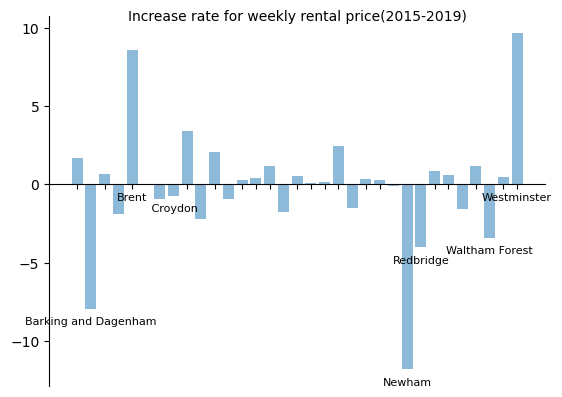

In [14]:
import matplotlib.pyplot as plt 
plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = [' ', 'Barking and Dagenham', ' ', ' ', 'Brent', 
           ' ', ' ', ' Croydon', ' ', ' ', ' ', ' ',
           ' ', ' ', ' ', ' ', ' ', 
           ' ', ' ', ' ',' ', ' ', ' ', ' ', 'Newham', 'Redbridge', 
           ' ', ' ', ' ', ' ', 'Waltham Forest',
           ' ', 'Westminster']
y_pos = np.arange(len(objects))
performance = rate

plt.bar(y_pos, performance, align='center', alpha=0.5)
# Get the axes object
ax = plt.gca()
# remove the existing ticklabels
ax.set_xticklabels([])
# remove the extra tick on the negative bar
ax.set_xticks([idx for (idx, x) in enumerate(performance) if x > 0])
ax.spines["bottom"].set_position(("data", 0))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
# placing each of the x-axis labels individually
label_offset = 0.5
for language, (x_position, y_position) in zip(objects, enumerate(performance)):
    if y_position > 0:
        label_y = -label_offset
    else:
        label_y = y_position - label_offset
    ax.text(x_position, label_y, language, ha="center",va="top",fontsize=8)
# Placing the x-axis label, note the transformation into `Axes` co-ordinates
# previously data co-ordinates for the x ticklabels
ax.text(0.5, 1, "Increase rate for weekly rental price(2015-2019)", ha="center", va="center", transform=ax.transAxes)

#fig.set_size_inches(18.5, 20.5)
plt.show()

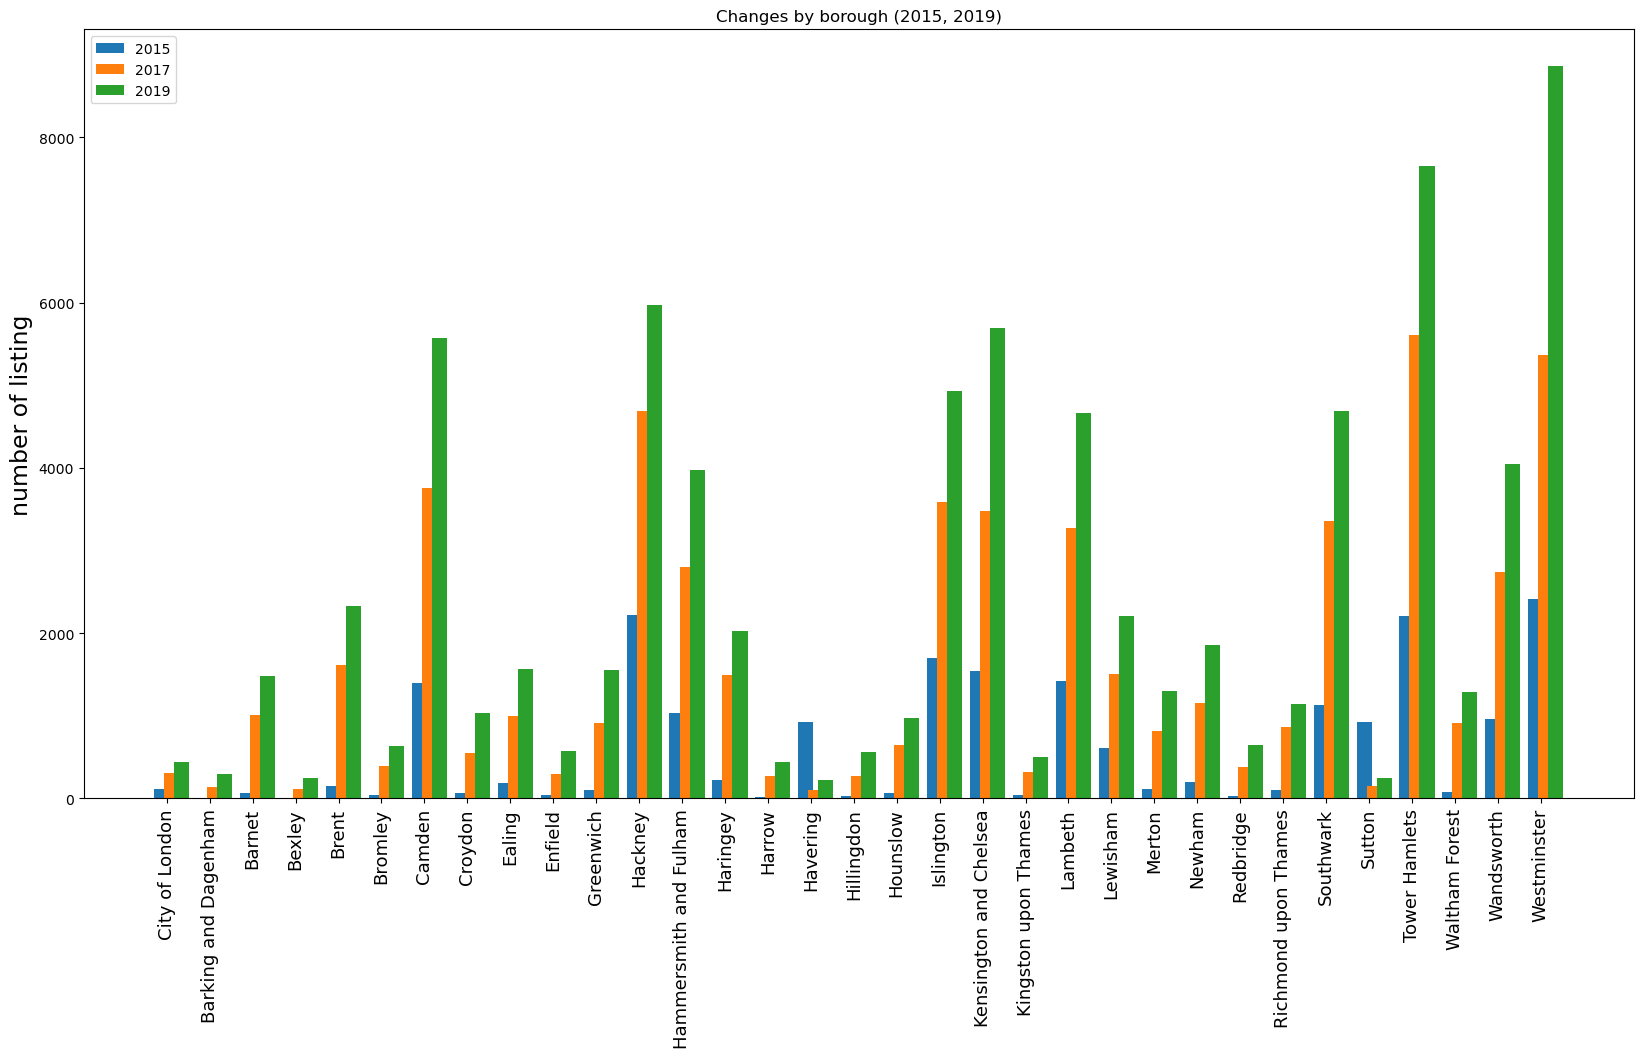

In [17]:
import matplotlib.pyplot as plt
import numpy as np


labels = borough
men_means = year_2015_n
no_means=year_2017_n
women_means = year_2019_n

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/3, men_means, width, label='2015')
rects2 = ax.bar(x + width/3, no_means, width, label='2017')
rects3 = ax.bar(x + 3*width/3, women_means, width, label='2019')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('number of listing',fontsize=17)
ax.set_title('Changes by borough (2015, 2019)')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90,fontsize=13)
#ax.set_xticklabels(xlabels, rotation=40, ha=ha[n])
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


#autolabel(rects1)
#autolabel(rects2)

fig.tight_layout()
fig.set_size_inches(18.5, 20.5)
#fig.savefig('test2png.png', dpi=100)

plt.show()

## fixed effect model


In [1]:
from statsmodels.datasets import grunfeld
from statsmodels.iolib.summary2 import summary_col
from linearmodels.panel import PanelOLS
import statsmodels.api as sm

In [19]:
fixed_effect = df[['Year', 'Borough', 'weekly_rent', 'Number_of_Listings',
       'Air_oo', 'population', 'qualification']]
fixed_effect.head()

,Year,Borough,weekly_rent,Number_of_Listings,Air_oo,population,qualification
0,2015,City of London,124.46,118.0,21473.804771,8000,80.0
1,2015,Barking and Dagenham,127.03,7.0,113.667639,203000,32.4
2,2015,Barnet,127.16,65.0,2086.170006,382000,49.1
3,2015,Bexley,111.21,5.0,189.736552,243000,33.6
4,2015,Brent,123.16,146.0,2624.540727,326000,45.1


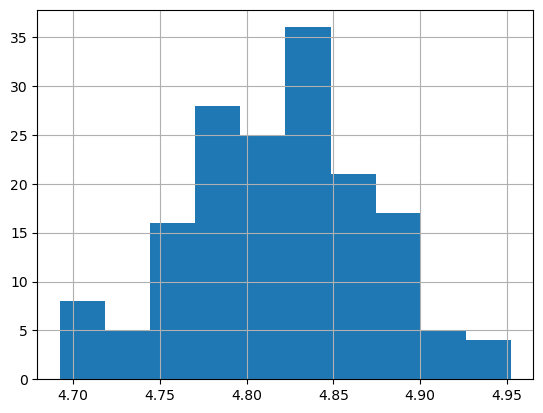

In [175]:
fixed_effect["weekly_rent"].apply(np.log).hist()
#df1["Number_of_Listings"].apply(np.log).hist()
plt.show()

In [20]:
fixed_effect["weekly_rent"]=fixed_effect["weekly_rent"].apply(np.log)
fixed_effect["Number_of_Listings"]=fixed_effect["Number_of_Listings"].apply(np.log)
fixed_effect["Air_oo"]=fixed_effect["Air_oo"].apply(np.log)
fixed_effect["population"]=fixed_effect["population"].apply(np.log)
fixed_effect["qualification"]=fixed_effect["qualification"].apply(np.log)

<ipython-input-20-fda2f2e8e7b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed_effect["weekly_rent"]=fixed_effect["weekly_rent"].apply(np.log)
<ipython-input-20-fda2f2e8e7b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed_effect["Number_of_Listings"]=fixed_effect["Number_of_Listings"].apply(np.log)
<ipython-input-20-fda2f2e8e7b0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

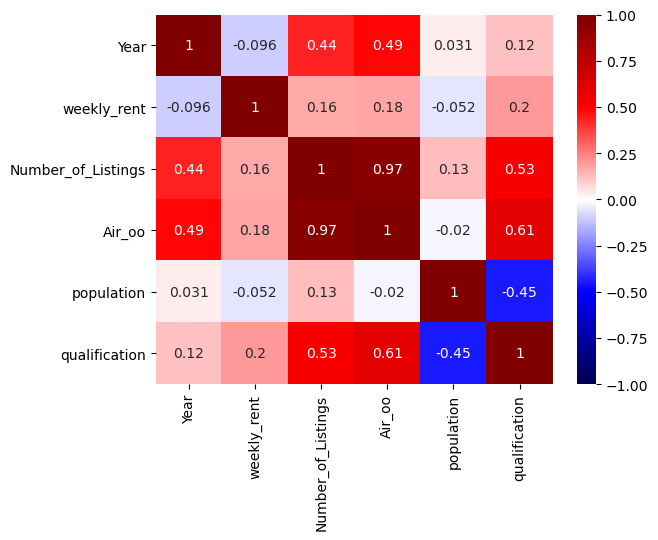

In [21]:
fixed_effect.corr() # Whole correlation matrix
fixed_effect.corr()['weekly_rent'] # Check correlations with outcome only
sns.heatmap(fixed_effect.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

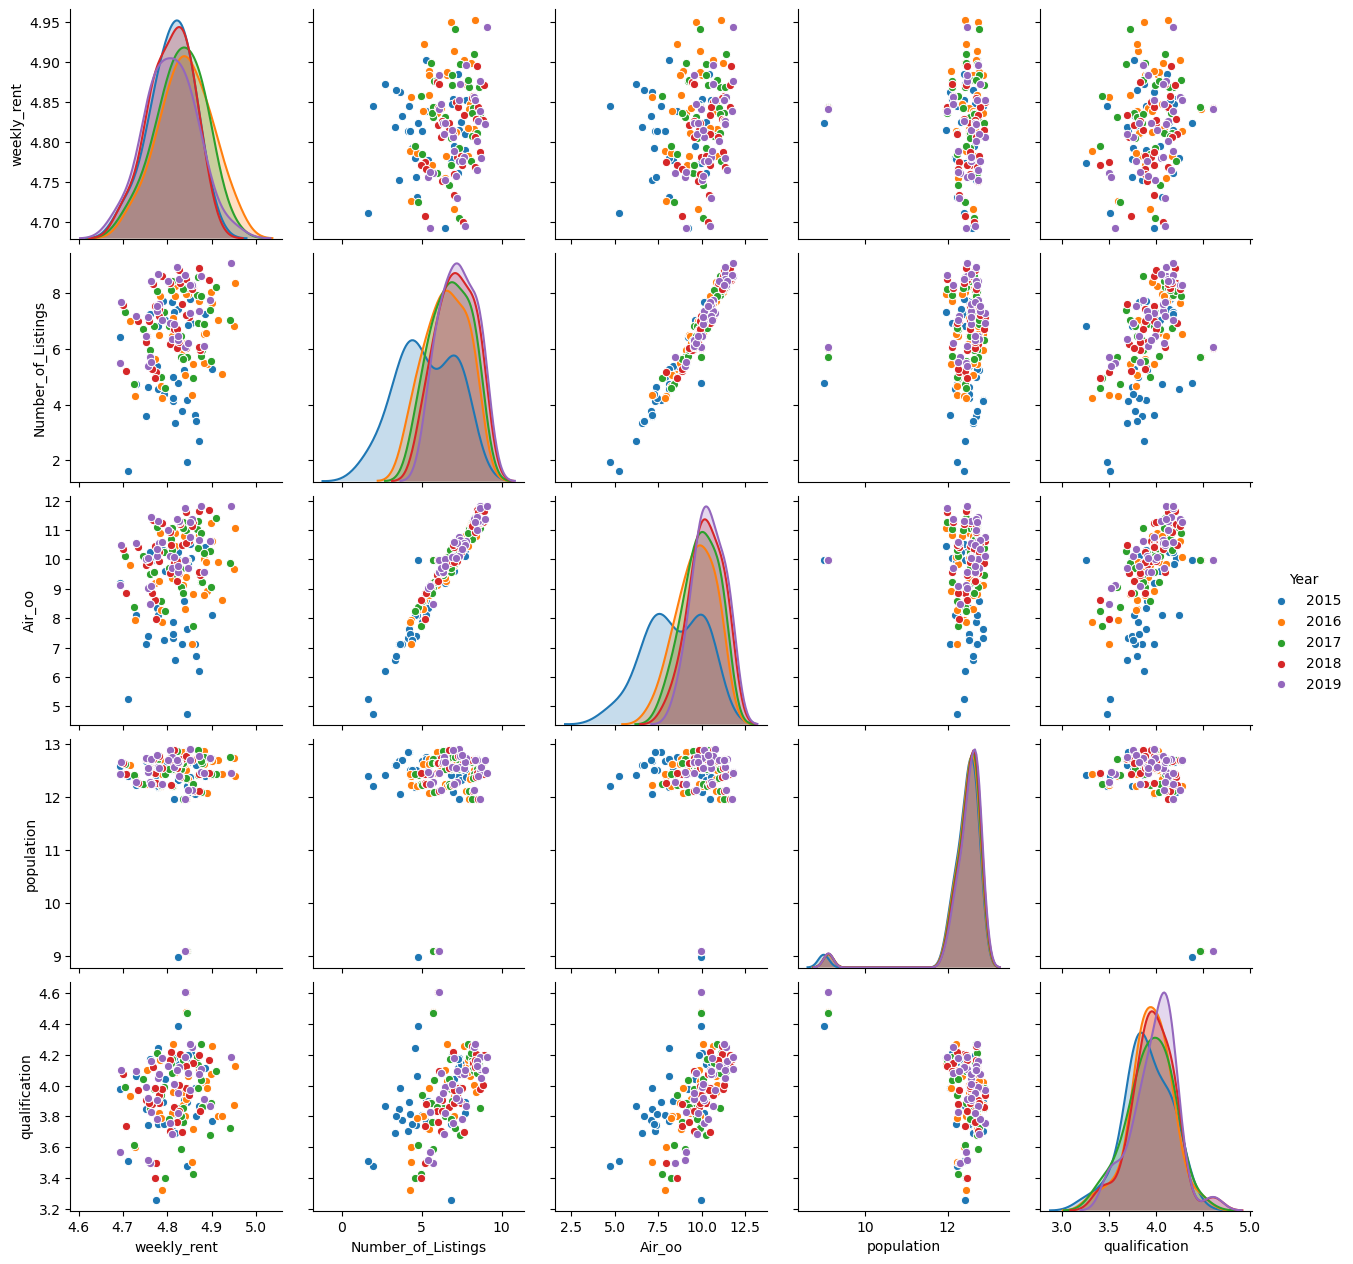

In [177]:
import seaborn as sns
sns.pairplot(fixed_effect ,hue ='Year')

In [178]:
data = grunfeld.load_pandas().data
data = fixed_effect.set_index(["Borough","Year"])
print(data.head())

                           weekly_rent  Number_of_Listings    Air_oo  \
Borough              Year                                              
City of London       2015     4.823984            4.770685  9.974589   
Barking and Dagenham 2015     4.844423            1.945910  4.733279   
Barnet               2015     4.845446            4.174387  7.643085   
Bexley               2015     4.711420            1.609438  5.245637   
Brent                2015     4.813484            4.983607  7.872661   

                           population  qualification  
Borough              Year                             
City of London       2015    8.987197       4.382027  
Barking and Dagenham 2015   12.220961       3.478158  
Barnet               2015   12.853176       3.893859  
Bexley               2015   12.400817       3.514526  
Brent                2015   12.694653       3.808882  


In [180]:
exog1 = sm.add_constant(data[['Number_of_Listings']])
grunfeld_fe1 = PanelOLS(data['weekly_rent'], exog1, entity_effects=False, time_effects=False)
grunfeld_fe1 = grunfeld_fe1.fit()
print(grunfeld_fe1)

exog2 = sm.add_constant(data[['Number_of_Listings']])
grunfeld_fe2 = PanelOLS(data['weekly_rent'], exog2, entity_effects=True, time_effects=True)
grunfeld_fe2 = grunfeld_fe2.fit()
print(grunfeld_fe2)

exog3 = sm.add_constant(data[['Number_of_Listings','Air_oo']])
grunfeld_fe3= PanelOLS(data['weekly_rent'], exog3, entity_effects=True, time_effects=True)
grunfeld_fe3 = grunfeld_fe3.fit()
print(grunfeld_fe3)

exog4 = sm.add_constant(data[['Number_of_Listings','Air_oo','population','qualification']])
grunfeld_fe4 = PanelOLS(data['weekly_rent'], exog4, entity_effects=True, time_effects=True)
grunfeld_fe4 = grunfeld_fe4.fit()
print(grunfeld_fe4)

                          PanelOLS Estimation Summary                           
Dep. Variable:            weekly_rent   R-squared:                        0.0270
Estimator:                   PanelOLS   R-squared (Between):              0.0455
No. Observations:                 165   R-squared (Within):              -0.0650
Date:                Wed, Jan 13 2021   R-squared (Overall):              0.0270
Time:                        03:49:06   Log-likelihood                    248.61
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      4.5282
Entities:                          33   P-value                           0.0348
Avg Obs:                       5.0000   Distribution:                   F(1,163)
Min Obs:                       5.0000                                           
Max Obs:                       5.0000   F-statistic (robust):             4.5282
                            

# Executive Briefing 

## introduction

Airbnb is a peer-to-peer marketplace that allows individuals to rent out their homes with others in a third party platform. It is now a buzzword in city life(Mara Ferreri), providing affordable places for tourists, it also forges a way for local residents to expand their income (web).  Now many studies show that the prevailing of airbnb is having great impact on urban environment ranging from transportation, housing, crime rate, and local residents (wed). Notably, strong evidence shows a casual effect of airbnb on rental prices (Merante and Horn). Meanwhile, they find evidence of airbnb shifting long-term towards short-term rental markets. Barron, Kung, and Proserpio (2018) conduct a research combining socio-economic characteristics in a time-varying and ZIP code level, finding that the increase of airbnb will lead to variance increase in rental price on different regions. A report from the urban politics and governance research group suggest that airbnb drive up rent in the way of impacting housing supply. 